<a href="https://colab.research.google.com/github/jpandersen61/Machine-Learning/blob/main/Unsupervised_learning_clustering_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

###Step 1: Setup actions

In [ ]:
import pandas as pd
from pathlib import Path

from google.colab import drive

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [ ]:
# extra code – this cell generates similar to figure 9–3 
# plot_decision_boundaries lets us plot Voronoi diagram with model's decision boundaries
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
# extra code – this cell generates similar to Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)



In [ ]:
#Mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the data for 'Mall Customers' from the 'Colab Notebooks' on your Google drive
dataset = pd.read_csv("drive/My Drive/Colab Notebooks/Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#Find customer segments on income and spending

###Step 2: Extract and inspect the dataset

In [ ]:
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values


In [ ]:
type(X)

numpy.ndarray

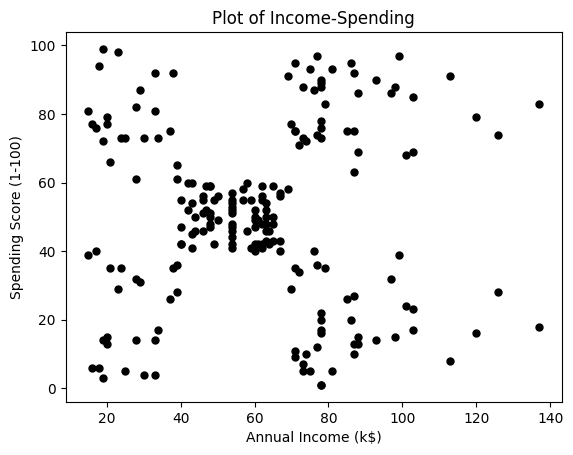

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 25, c = 'black')
plt.title('Plot of Income-Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


###Step 3: Calculate results for elbow and silhouette analysis

In [ ]:
kmeans_per_k = [KMeans(n_init=10, n_clusters=k, init = 'k-means++', random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]


###Step 4: Determine number of clusters from inertia

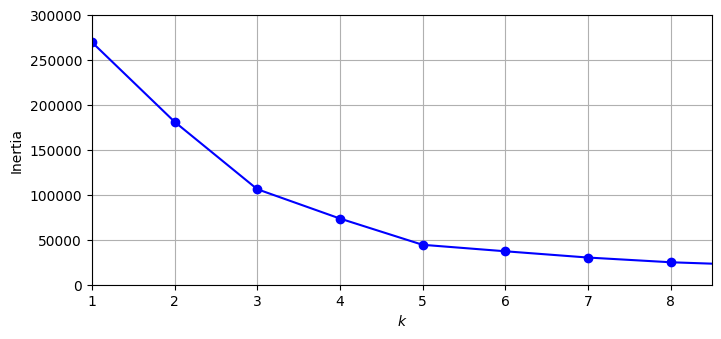

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 300000])
plt.grid()
plt.show()

###Step 5: Determine number of clusters from silhouette scores

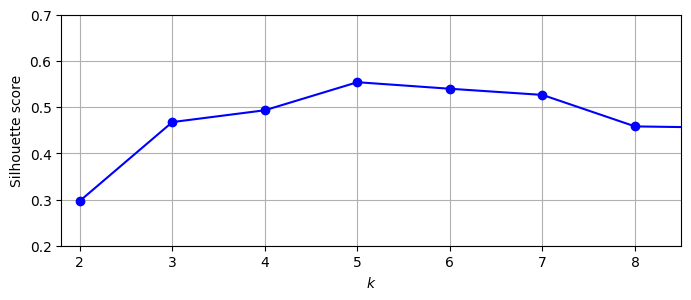

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.2, 0.7])
plt.grid()
plt.show()

###Step 6: Visualize and interpret the clusters

In [ ]:
kmeans = KMeans(n_init=10, n_clusters=5, random_state=42).fit(X)
                

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [ ]:
kmeans.inertia_

44448.4554479337

In [ ]:
silhouette_score(X, kmeans.labels_)

0.553931997444648

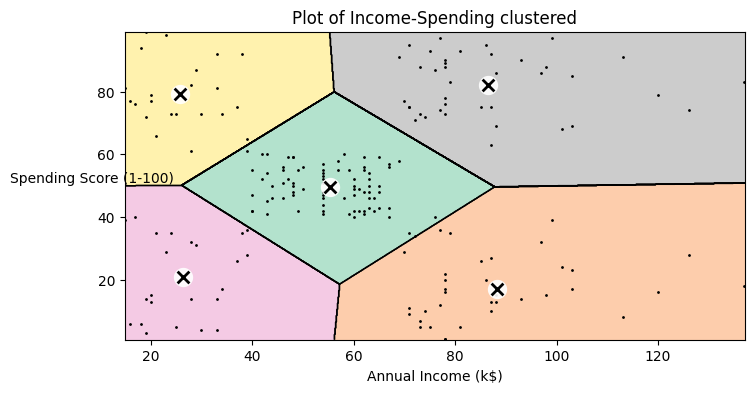

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title('Plot of Income-Spending clustered')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Find customer segments on age and spending

###Step 7: Extract and inspect another dataset (age-spending score)

In [ ]:
X = dataset[["Age", "Spending Score (1-100)"]].values


In [ ]:
type(X)

numpy.ndarray

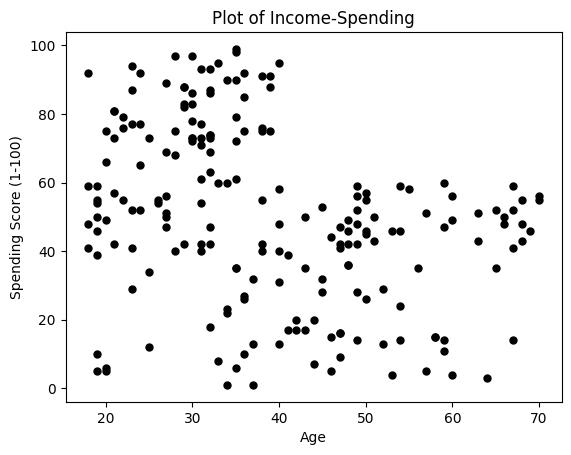

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 25, c = 'black')
plt.title('Plot of Income-Spending')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


###Step 8: Repeat steps 3-6 on the other dataset (age-spending score)

###Step 3: Calculate results for elbow and silhouette analysis (repeated)

In [ ]:
kmeans_per_k = [KMeans(n_init=10, n_clusters=k, init = 'k-means++', random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]


###Step 4: Determine number of clusters from inertia (repeated)

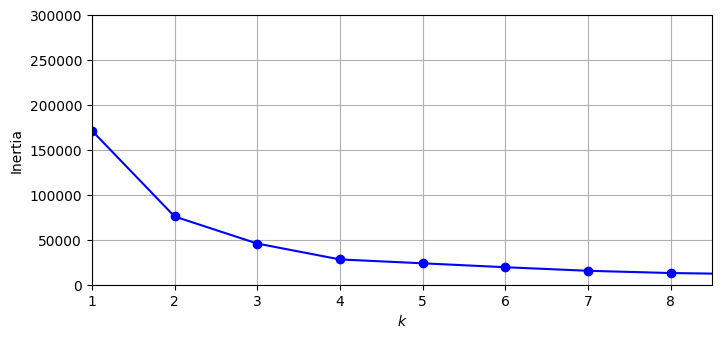

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 300000])
plt.grid()
plt.show()

###Step 5: Determine number of clusters from silhouette scores (repeated)

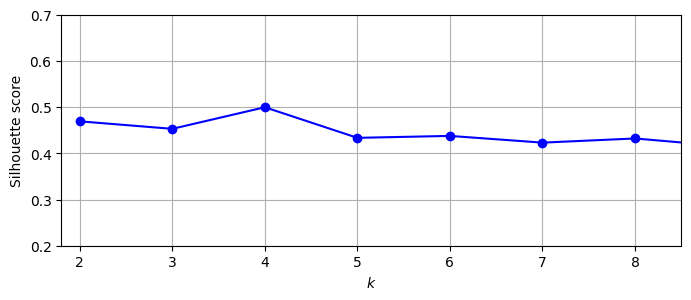

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.2, 0.7])
plt.grid()
plt.show()

###Step 6: Visualize and interpret the clusters (repeated)

In [ ]:
kmeans = KMeans(n_init=10, n_clusters=4, random_state=42).fit(X)
                

In [ ]:
kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

In [ ]:
kmeans.inertia_

28165.583566629342

In [ ]:
silhouette_score(X, kmeans.labels_)

0.49973941540141753

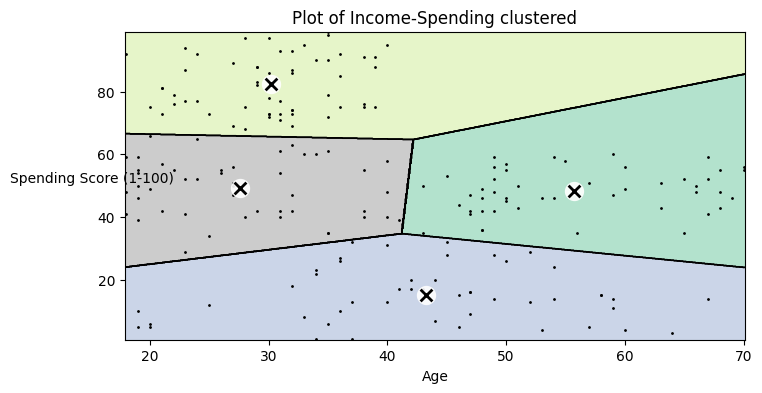

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title('Plot of Income-Spending clustered')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Density and outliers

###Step 9:  Visualize density and possible outliers 

In [ ]:
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values


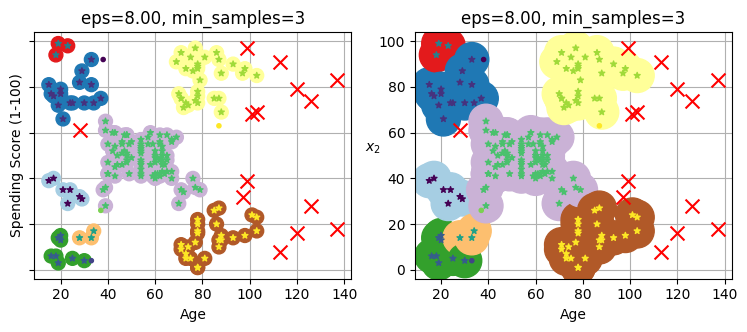

In [ ]:
dbscan = DBSCAN(eps=8,min_samples=3)
dbscan.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plt.ylabel('Spending Score (1-100)')
plot_dbscan(dbscan, X, size=100, show_ylabels=False)
plt.xlabel('Age')


plt.subplot(122)

plt.ylabel('Spending Score (1-100)')
plot_dbscan(dbscan, X, size=600)
plt.xlabel('Age')

#save_fig("dbscan_plot")
plt.show()